# Heuristic algorithms

[Heursitic](https://en.wikipedia.org/wiki/Heuristic_(computer_science)) - guess, which is with a high probability leads to a good result.

## A*

$A^*$ — heuristic greedy-like algorithm for finding path, working with lower bound estimation. 

$\huge f(n) = g(n) + h(n)$

- $n$ is the next node on the path,
- $g(n)$ is the cost of the path from the start node to $n$.
- $h(n)$ is a **heuristic function** that estimates the cost of the cheapest path from $n$ to the goal.


## Short and complex explainer

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/vP5TkF0xJgI', 560, 315)

## With cool British accent

In [2]:
IFrame('https://www.youtube.com/embed/ySN5Wnu88nE', 600, 400)

## And a good one with visualization

In [3]:
IFrame('https://www.youtube.com/embed/qXZt-B7iUyw', 600, 400)

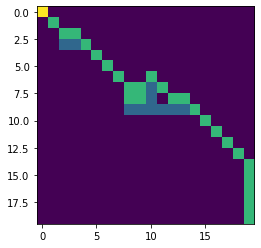

In [7]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import numpy as np

neighbours8 = [
    (1, 0), (0, 1), (-1, 0), (0, -1),
    (1, 1), (-1, 1), (1, -1), (-1, -1),
]   # 8-neghbourhood
neighbours4 = [
    (1, 0), (0, 1), (-1, 0), (0, -1),
]   # 4-neghbourhood


# distance between a and b
def d(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** .5

def A_star(lab, dist, position, destination):
    neighbours = neighbours8
    candidates = []  # where go next?
    
    ###############################################################
    ###############################################################
    ### Consider this block
    
    for neighbour in neighbours:
        candidate = (position[0] + neighbour[0], position[1] + neighbour[1]) 
        # it is inside labyrinth
        if 0 <= candidate[0] < lab.shape[0] and \
           0 <= candidate[1] < lab.shape[1]:
            # it is accessible
            if lab[candidate] == 0:
                candidates.append(candidate)

    # best choise
    result, estimation = position, None
    for candidate in candidates:
        g = dist
        h = d(candidate, destination)
        A = g + h

        if estimation is None or A < estimation:
            result, estimation = candidate, A
    lab[result] = 2   # visited
    return result, d(result, position)
    
    #####################################################
    #####################################################


def show(matr):
    plt.imshow(matr)
    plt.show()

size = 20
lab = np.zeros((size, size))

# start
lab[0,0] = 3

# obstacles
lab[3,2:4] = 1
lab[7:10,10] = 1
lab[9,8:14] = 1

start, finish = (0, 0), (size-1, size-1)
passed = 0

while start != finish:
    clear_output()
    start, delta = A_star(lab, passed, start, finish)
    show(lab)
    time.sleep(0.5)
    passed += delta